In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics
from scipy import stats
import scipy
from datetime import datetime

In [2]:
df  = pd.read_csv("USvideos.csv")
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


In [3]:
df.head(10)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
5,gHZ1Qz0KiKM,17.14.11,2 Weeks with iPhone X,iJustine,28,2017-11-13T19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False,Using the iPhone for the past two weeks -- her...
6,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,2017-11-12T05:37:17.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...
7,nc99ccSXST0,17.14.11,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,28,2017-11-12T21:50:37.000Z,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732,23663,778,3432,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,False,False,False,Ice Cream Pint Combination Lock - http://amzn....
8,jr9QtXwC9vc,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,1,2017-11-13T14:00:23.000Z,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,"Inspired by the imagination of P.T. Barnum, Th..."
9,TUmyygCMMGA,17.14.11,Why the rise of the robots won’t mean the end ...,Vox,25,2017-11-13T13:45:16.000Z,"vox.com|""vox""|""explain""|""shift change""|""future...",256426,12654,1363,2368,https://i.ytimg.com/vi/TUmyygCMMGA/default.jpg,False,False,False,"For now, at least, we have better things to wo..."


In [4]:
df.shape

(40949, 16)

In [5]:
df.drop_duplicates(inplace=True)
df.shape

(40901, 16)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 40901 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40901 non-null  object
 1   trending_date           40901 non-null  object
 2   title                   40901 non-null  object
 3   channel_title           40901 non-null  object
 4   category_id             40901 non-null  int64 
 5   publish_time            40901 non-null  object
 6   tags                    40901 non-null  object
 7   views                   40901 non-null  int64 
 8   likes                   40901 non-null  int64 
 9   dislikes                40901 non-null  int64 
 10  comment_count           40901 non-null  int64 
 11  thumbnail_link          40901 non-null  object
 12  comments_disabled       40901 non-null  bool  
 13  ratings_disabled        40901 non-null  bool  
 14  video_error_or_removed  40901 non-null  bool  
 15  descrip

In [7]:
df.describe(include = 'all')

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
count,40901,40901,40901,40901,40901.000000,40901,40901,4.090100e+04,4.090100e+04,4.090100e+04,4.090100e+04,40901,40901,40901,40901,40332
unique,6351,205,6455,2207,NaN,6269,6055,NaN,NaN,NaN,NaN,6352,2,2,2,6901
top,j4KvrAUjn6c,17.14.11,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,NaN,2018-05-18T14:00:04.000Z,[none],NaN,NaN,NaN,NaN,https://i.ytimg.com/vi/8h--kFui1JA/default.jpg,False,False,False,► Listen LIVE: http://power1051fm.com/\n► Face...
freq,29,200,29,202,NaN,50,1534,NaN,NaN,NaN,NaN,29,40269,40732,40878,58
mean,NaN,NaN,NaN,NaN,19.970588,NaN,NaN,2.360678e+06,7.427173e+04,3.711722e+03,8.448567e+03,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,7.569362,NaN,NaN,7.397719e+06,2.289999e+05,2.904624e+04,3.745139e+04,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,17.000000,NaN,NaN,2.419720e+05,5.416000e+03,2.020000e+02,6.130000e+02,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,24.000000,NaN,NaN,6.810640e+05,1.806900e+04,6.300000e+02,1.855000e+03,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,25.000000,NaN,NaN,1.821926e+06,5.533800e+04,1.936000e+03,5.752000e+03,NaN,NaN,NaN,NaN,NaN


In [8]:
df.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               569
dtype: int64

In [9]:
df.drop(columns= {'thumbnail_link','description'},inplace=True,axis=1)

df.shape

(40901, 14)

In [10]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,False,False,False
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,False,False
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,False,False,False
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,False,False,False


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40901 entries, 0 to 40948
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40901 non-null  object
 1   trending_date           40901 non-null  object
 2   title                   40901 non-null  object
 3   channel_title           40901 non-null  object
 4   category_id             40901 non-null  int64 
 5   publish_time            40901 non-null  object
 6   tags                    40901 non-null  object
 7   views                   40901 non-null  int64 
 8   likes                   40901 non-null  int64 
 9   dislikes                40901 non-null  int64 
 10  comment_count           40901 non-null  int64 
 11  comments_disabled       40901 non-null  bool  
 12  ratings_disabled        40901 non-null  bool  
 13  video_error_or_removed  40901 non-null  bool  
dtypes: bool(3), int64(5), object(6)
memory usage: 3.9+ MB


In [12]:
df.describe(include = 'all')

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
count,40901,40901,40901,40901,40901.000000,40901,40901,4.090100e+04,4.090100e+04,4.090100e+04,4.090100e+04,40901,40901,40901
unique,6351,205,6455,2207,NaN,6269,6055,NaN,NaN,NaN,NaN,2,2,2
top,j4KvrAUjn6c,17.14.11,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,NaN,2018-05-18T14:00:04.000Z,[none],NaN,NaN,NaN,NaN,False,False,False
freq,29,200,29,202,NaN,50,1534,NaN,NaN,NaN,NaN,40269,40732,40878
mean,NaN,NaN,NaN,NaN,19.970588,NaN,NaN,2.360678e+06,7.427173e+04,3.711722e+03,8.448567e+03,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,7.569362,NaN,NaN,7.397719e+06,2.289999e+05,2.904624e+04,3.745139e+04,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,17.000000,NaN,NaN,2.419720e+05,5.416000e+03,2.020000e+02,6.130000e+02,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,24.000000,NaN,NaN,6.810640e+05,1.806900e+04,6.300000e+02,1.855000e+03,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,25.000000,NaN,NaN,1.821926e+06,5.533800e+04,1.936000e+03,5.752000e+03,NaN,NaN,NaN


In [13]:
# df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')

# df.head()

In [14]:
df['trending_date'] = df['trending_date'].apply(lambda x: datetime.strptime(x, '%y.%d.%m'))

df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,False,False,False
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,False,False
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,False,False,False
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,False,False,False


In [15]:
df['publish_time'] = pd.to_datetime(df['publish_time'])


df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,False,False,False
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,False,False
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,False,False,False
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,False,False,False


In [16]:
df['publish_year'] = df['publish_time'].dt.year
df['publish_month'] = df['publish_time'].dt.month
df['publish_day'] = df['publish_time'].dt.day
df['publish_hour'] = df['publish_time'].dt.hour

df.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,publish_year,publish_month,publish_day,publish_hour
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,False,False,False,2017,11,13,17
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False,2017,11,13,7
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,False,False,2017,11,12,19
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,False,False,False,2017,11,13,11
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,False,False,False,2017,11,12,18


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40901 entries, 0 to 40948
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                40901 non-null  object             
 1   trending_date           40901 non-null  datetime64[ns]     
 2   title                   40901 non-null  object             
 3   channel_title           40901 non-null  object             
 4   category_id             40901 non-null  int64              
 5   publish_time            40901 non-null  datetime64[ns, UTC]
 6   tags                    40901 non-null  object             
 7   views                   40901 non-null  int64              
 8   likes                   40901 non-null  int64              
 9   dislikes                40901 non-null  int64              
 10  comment_count           40901 non-null  int64              
 11  comments_disabled       40901 non-null  bool  

In [18]:
df.shape

(40901, 18)

In [19]:
df['category_id'].unique()

array([22, 24, 23, 28,  1, 25, 17, 10, 15, 27, 26,  2, 19, 20, 29, 43],
      dtype=int64)

In [20]:
print(sorted(df['category_id'].unique()))


[1, 2, 10, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 43]


In [21]:
df['category_name'] = np.nan

In [22]:
df.loc[(df['category_id']==1),'category_name'] = 'Film & Animation'
df.loc[(df['category_id']==2),'category_name'] = 'Autos & Vehicles'
df.loc[(df['category_id']==10),'category_name'] = 'Music'
df.loc[(df['category_id']==15),'category_name'] = 'Pets & Animals'
df.loc[(df['category_id']==17),'category_name'] = 'Sports'
df.loc[(df['category_id']==19),'category_name'] = 'Travel & Events'
df.loc[(df['category_id']==20),'category_name'] = 'Gaming'
df.loc[(df['category_id']==22),'category_name'] = 'People & Blogs'
df.loc[(df['category_id']==23),'category_name'] = 'Comedy'
df.loc[(df['category_id']==24),'category_name'] = 'Entertainment'
df.loc[(df['category_id']==25),'category_name'] = 'News & Politics'
df.loc[(df['category_id']==26),'category_name'] = 'Howto & Style'
df.loc[(df['category_id']==27),'category_name'] = 'Education'
df.loc[(df['category_id']==28),'category_name'] = 'Science & Technology'
df.loc[(df['category_id']==29),'category_name'] = 'Nonprofits & Activism'
df.loc[(df['category_id']==30),'category_name'] = 'Movis'
df.loc[(df['category_id']==43),'category_name'] = 'Shows'


df.head()


C:\Users\moham\AppData\Local\Temp\ipykernel_25780\3860556685.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Film & Animation' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[(df['category_id']==1),'category_name'] = 'Film & Animation'


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,publish_year,publish_month,publish_day,publish_hour,category_name
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,False,False,False,2017,11,13,17,People & Blogs
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False,2017,11,13,7,Entertainment
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,False,False,2017,11,12,19,Comedy
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,False,False,False,2017,11,13,11,Entertainment
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,False,False,False,2017,11,12,18,Entertainment


In [23]:
df['publish_year'].unique()

array([2017, 2011, 2015, 2012, 2010, 2016, 2009, 2013, 2008, 2014, 2018,
       2006])

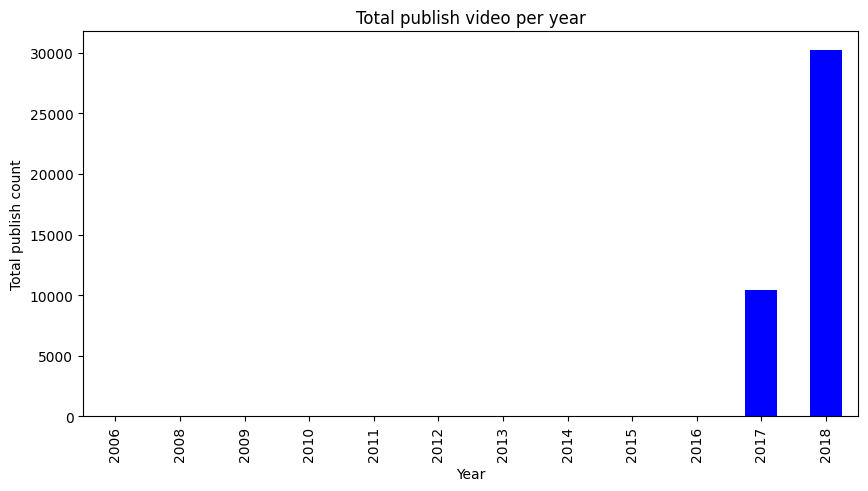

In [24]:
yrly_video_counts = df.groupby('publish_year')['video_id'].count()

yrly_video_counts.plot(kind='bar', xlabel = 'Year', ylabel = 'Total publish count',title = 'Total publish video per year',figsize=(10,5), color='blue', fontsize=10)

plt.show()

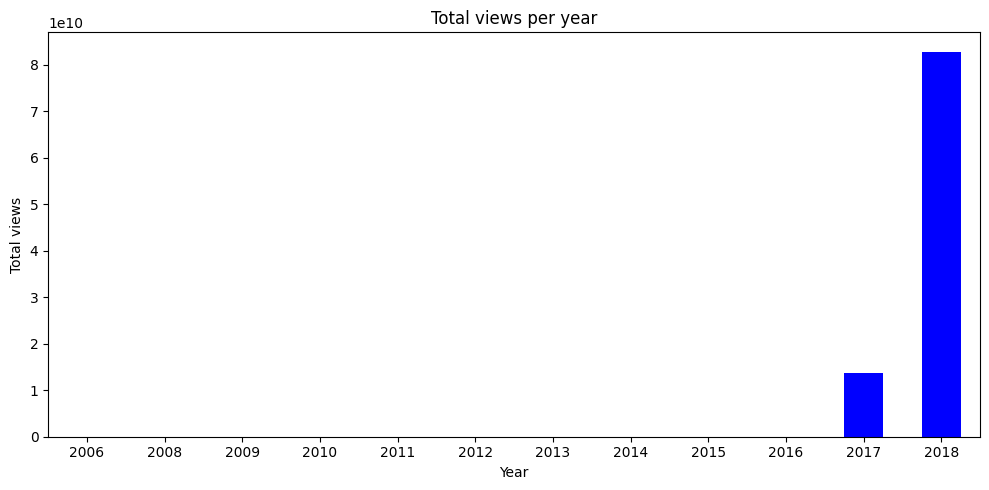

In [25]:
yrly_views = df.groupby('publish_year')['views'].sum()

yrly_views.plot(kind='bar', xlabel = 'Year', ylabel = 'Total views',title = 'Total views per year',figsize=(10,5), color='blue', fontsize=10)

plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

In [26]:
category_views = df.groupby('category_name')['views'].sum()
category_views

category_name
Autos & Vehicles           520690717
Comedy                    5111266590
Education                 1180175828
Entertainment            20561101882
Film & Animation          7267792432
Gaming                    2127799781
Howto & Style             4071011870
Music                    40126286541
News & Politics           1473090484
Nonprofits & Activism      168941392
People & Blogs            4910004664
Pets & Animals             764651989
Science & Technology      3473462753
Shows                       51501058
Sports                    4403213872
Travel & Events            343100609
Name: views, dtype: int64

In [27]:
category_views = df.groupby('category_name')['views'].sum().reset_index()
category_views

,category_name,views
0,Autos & Vehicles,520690717
1,Comedy,5111266590
2,Education,1180175828
3,Entertainment,20561101882
4,Film & Animation,7267792432
5,Gaming,2127799781
6,Howto & Style,4071011870
7,Music,40126286541
8,News & Politics,1473090484
9,Nonprofits & Activism,168941392


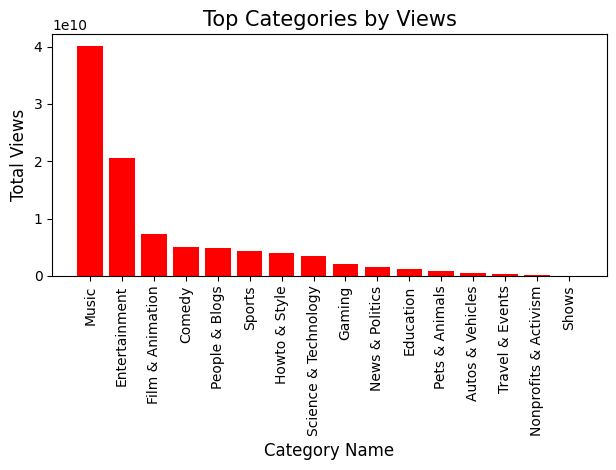

In [28]:
top_categories = category_views.sort_values(by = 'views', ascending = False)

plt.bar(top_categories['category_name'], top_categories['views'], color='red')
plt.xlabel('Category Name', fontsize=12)
plt.ylabel('Total Views', fontsize=12)
plt.xticks(rotation=90)
plt.title('Top Categories by Views', fontsize=15)
plt.tight_layout()
plt.show()


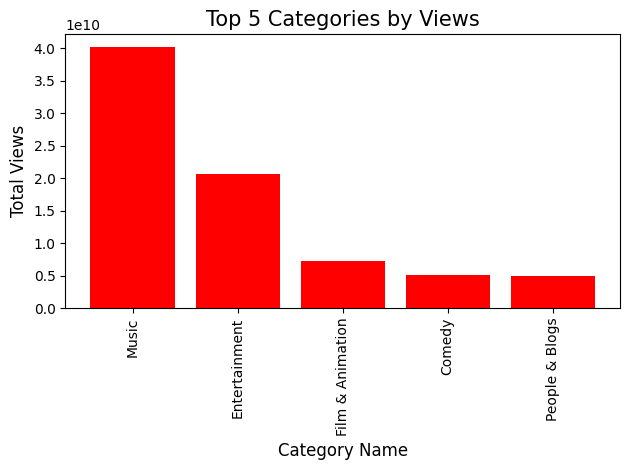

In [29]:
top_categories = category_views.sort_values(by = 'views', ascending = False).head(5)

plt.bar(top_categories['category_name'], top_categories['views'], color='red')
plt.xlabel('Category Name', fontsize=12)
plt.ylabel('Total Views', fontsize=12)
plt.xticks(rotation=90)
plt.title('Top 5 Categories by Views', fontsize=15)
plt.tight_layout()
plt.show()


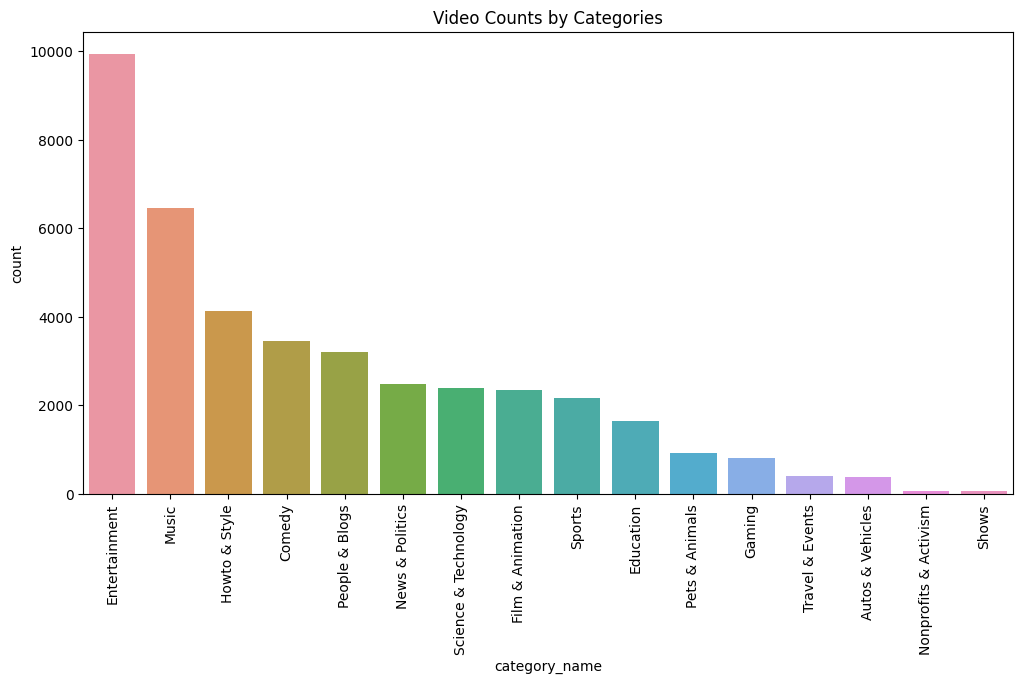

In [30]:
plt.figure(figsize=(12,6))
sns.countplot(data = df, x = 'category_name',  order = df['category_name'].value_counts().index) 
plt.xticks(rotation=90)
plt.title('Video Counts by Categories')
plt.show()

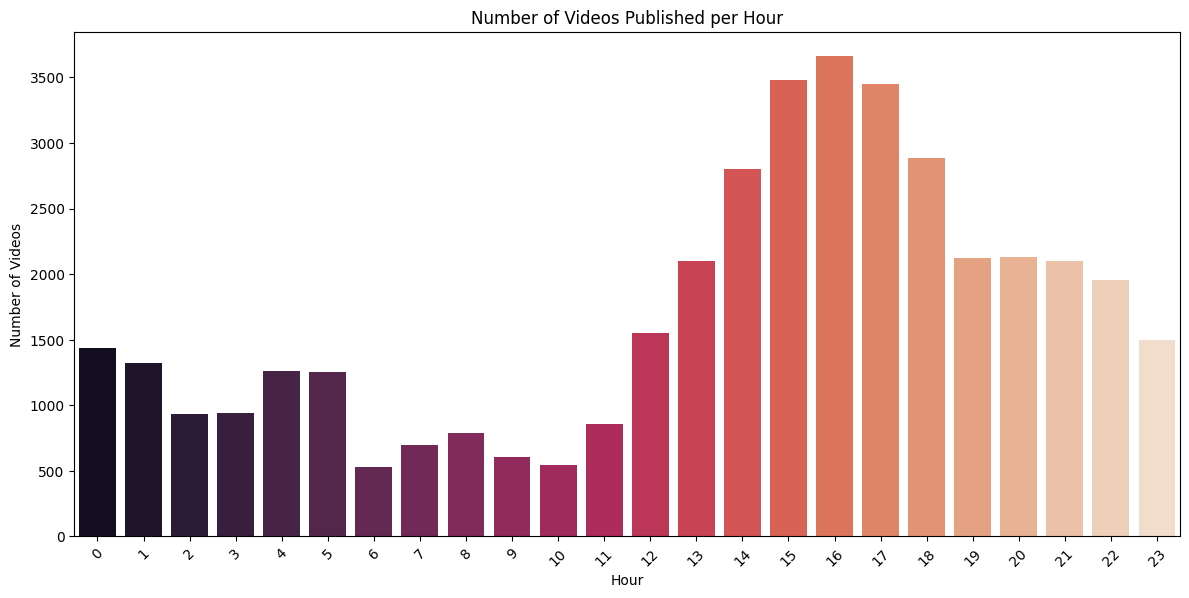

In [31]:
videos_per_hour = df['publish_hour'].value_counts().sort_index()

plt.figure(figsize=(12,6))

sns.barplot(x = videos_per_hour.index, y = videos_per_hour.values, palette='rocket')
plt.xlabel('Hour')
plt.ylabel('Number of Videos')
plt.title('Number of Videos Published per Hour')
plt.tight_layout()
plt.xticks(rotation = 45)
plt.show()

In [32]:
df['publish_time'] = pd.to_datetime(df['publish_time'])
df.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,publish_year,publish_month,publish_day,publish_hour,category_name
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,False,False,False,2017,11,13,17,People & Blogs
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False,2017,11,13,7,Entertainment


In [33]:
df['publish_date'] = df['publish_time'].dt.date
df.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,publish_year,publish_month,publish_day,publish_hour,category_name,publish_date
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,False,False,False,2017,11,13,17,People & Blogs,2017-11-13
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False,2017,11,13,7,Entertainment,2017-11-13


C:\Users\moham\AppData\Local\Temp\ipykernel_25780\2622706910.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = video_cnt_by_date.index, y = video_cnt_by_date.values, palette='rocket')
d:\ANACONDA_Jupyter2024\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\ANACONDA_Jupyter2024\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


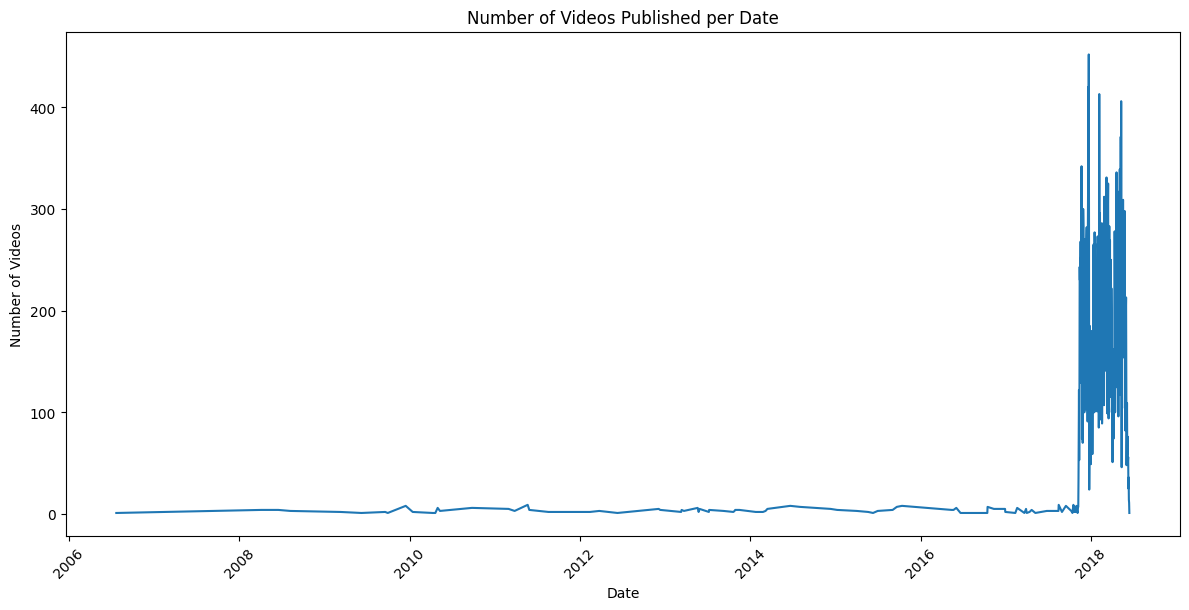

In [34]:
video_cnt_by_date = df.groupby('publish_date').size()

plt.figure(figsize=(12,6))
sns.lineplot(x = video_cnt_by_date.index, y = video_cnt_by_date.values, palette='rocket')
plt.xlabel('Date')
plt.ylabel('Number of Videos')
plt.title('Number of Videos Published per Date')
plt.tight_layout()
plt.xticks(rotation = 45)
plt.show()

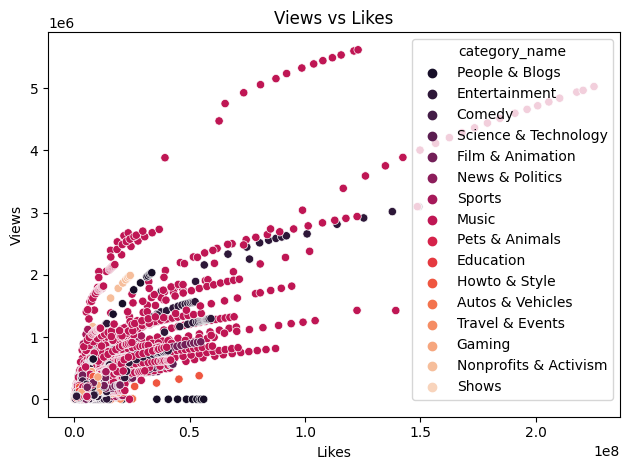

In [35]:
sns.scatterplot(data = df, x = 'views', y = 'likes', hue = 'category_name', palette='rocket')
plt.xlabel('Likes')
plt.ylabel('Views')
plt.title('Views vs Likes')
plt.tight_layout()
plt.show()

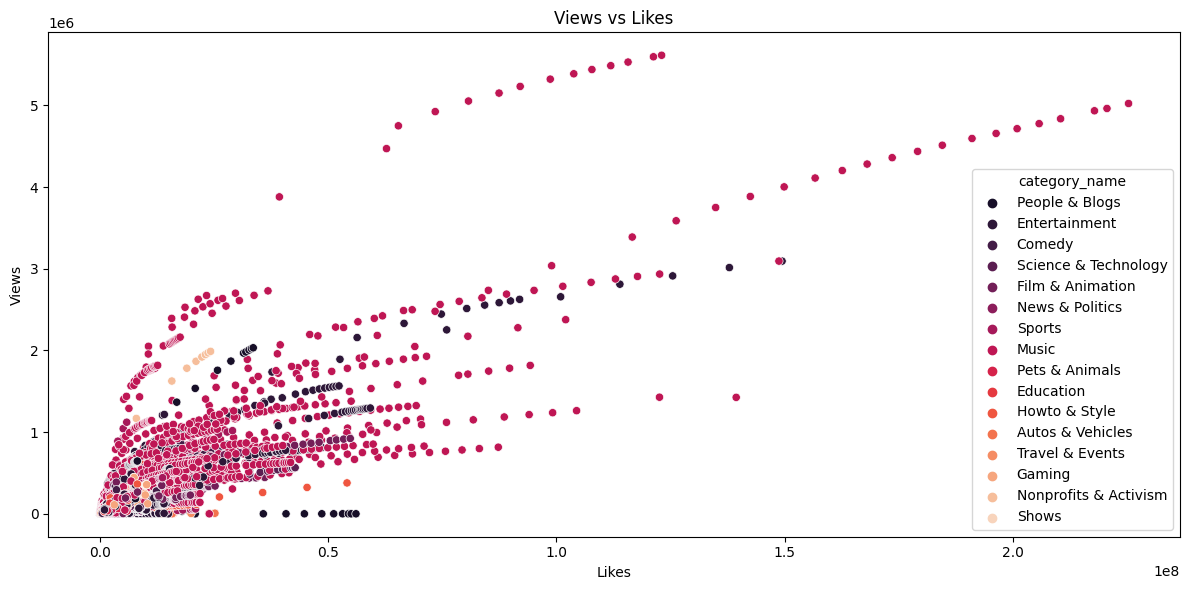

In [36]:
plt.figure(figsize=(12,6))
sns.scatterplot(data = df, x = 'views', y = 'likes', hue = 'category_name', palette='rocket')
plt.xlabel('Likes')
plt.ylabel('Views')
plt.title('Views vs Likes')
plt.tight_layout()
plt.show()

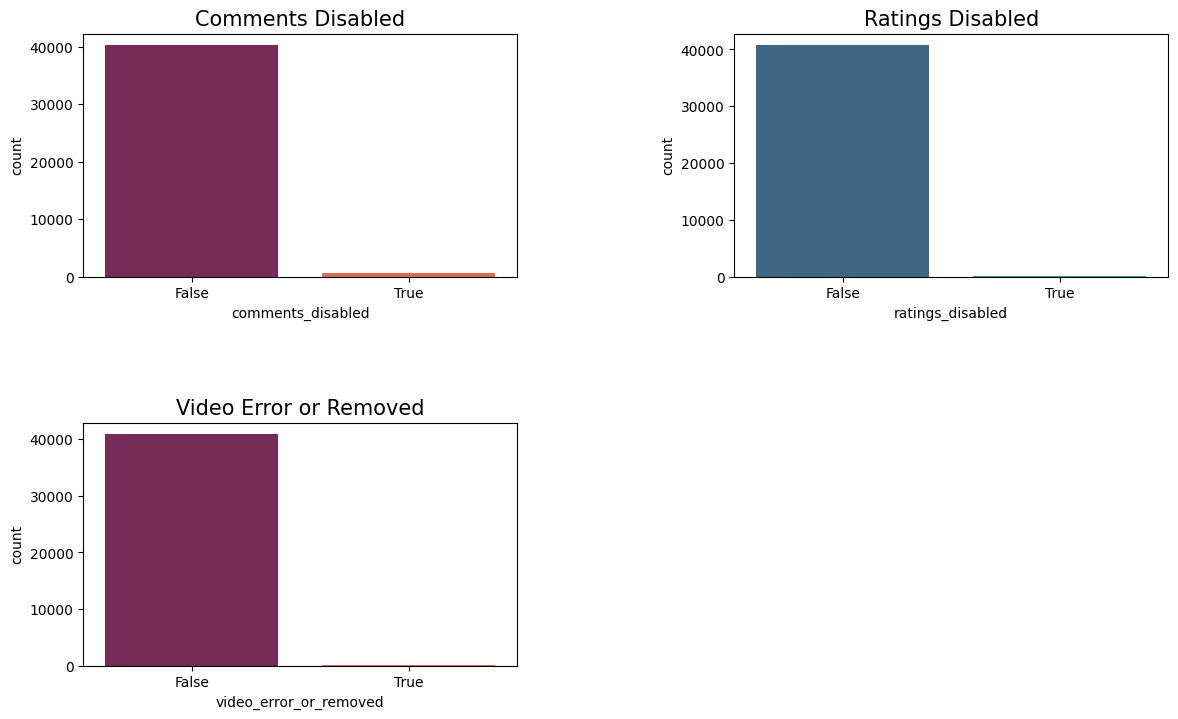

In [45]:
plt.figure(figsize=(14,8))
plt.subplots_adjust(wspace=0.5, hspace=0.6, top=0.9)

plt.subplot(2,2,1)
sns.countplot(data = df, x = 'comments_disabled', palette='rocket')
plt.title('Comments Disabled', fontsize=15)


plt.subplot(2,2,2)
sns.countplot(data = df, x = 'ratings_disabled', palette='viridis')
plt.title('Ratings Disabled', fontsize=15)

plt.subplot(2,2,3)
sns.countplot(data = df, x = 'video_error_or_removed', palette='rocket')
plt.title('Video Error or Removed', fontsize=15)

plt.show()




In [46]:
corr_matrix = df['views'].corr(df['likes'])
corr_matrix

0.8491785476230503

C:\Users\moham\AppData\Local\Temp\ipykernel_25780\3790770855.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data = df, x = 'views', y = 'likes', palette='rocket')
d:\ANACONDA_Jupyter2024\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\ANACONDA_Jupyter2024\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='views', ylabel='likes'>

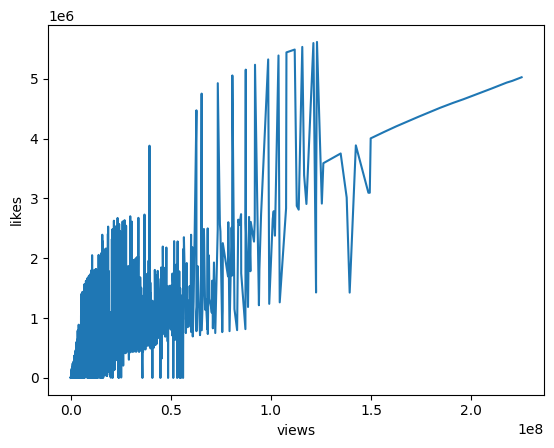

In [47]:
sns.lineplot(data = df, x = 'views', y = 'likes', palette='rocket')